<a href="https://colab.research.google.com/github/clferreira1985/Projetos_Python/blob/main/Renova/Desafio_Tecnico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Técnica

**Contexto:** . Temos dois conjuntos de dados, um com o resultado e outros com o eleitores. O Objetivo do presente desafio é fazer um tratamento nos dados responder algumas perguntas como:

1º Fazer tratamento em alguns registros que estão gramaticalmente incorretos;
2º Criar um tabela para cada base de dados (eleitorado e resultados);
3º Gerar uma consulta realizando um **JOIN** entre as tabelas, retornando algumas informações como:


      *   Em qual município o candidato X foi mais votado;
      *   Qual o Candidato foi mais votado em cada município;
      *   Qual o perfil do eleitorado (faixa etária, gênero, grau de escolaridade, etc.) mais votou em cada candidato.
       

**Estrutura:** O notebook está dividido assim:

1. Importação das bibliotecas
2. Acesso aos dados
3. Analise da qualidade dos dados
4. Análise exploratória dos dados
5. Criação das Tabelas
6. Gráficos / Respostas

**Créditos:** O notebook foi desenvolvido e documentado por:

- Cleiton Silva

**Dataset:** OS dados foram enviados pela empresa, sendo que estão disponíveis através do site do TSE. O dataset dos resultados está corropido depois da linha informado abaixo

##1. Importação das bibliotecas

In [ ]:
import gdown
from zipfile import ZipFile
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


##2. Acesso e tratamento dos dados

In [ ]:
#download do dataset
file_id = "1QqKoXpnx16eRqCHUn72fR_qT4yBXpQ8T"
folder_path = f"https://drive.google.com/uc?id={file_id}"
output = "database_desfio_renovaBR.zip"
gdown.download(folder_path, output)

Downloading...
From (uriginal): https://drive.google.com/uc?id=1QqKoXpnx16eRqCHUn72fR_qT4yBXpQ8T
From (redirected): https://drive.google.com/uc?id=1QqKoXpnx16eRqCHUn72fR_qT4yBXpQ8T&confirm=t&uuid=5ef0e03d-065d-4920-8916-7f261b4b9856
To: c:\Users\Clfer\Downloads\database_desfio_renovaBR.zip
100%|██████████| 234M/234M [00:11<00:00, 20.9MB/s] 


'database_desfio_renovaBR.zip'

In [ ]:
#Extraindo o dataset do zip
with ZipFile('database_desfio_renovaBR.zip', 'r') as zip_object:
  zip_object.extractall()

In [ ]:
# Ler o arquivo CSV até a linha 3779751 acima dessa linha está corrompido as linhas
n_linhas = 3779751
caminho = "/Users/Clfer/Downloads/resultados/SP_turno_1.csv"
df_resultados = pd.read_csv(caminho, encoding='latin1', sep=';', nrows=n_linhas)

# Mostrar o DataFrame
df_resultados.head(2)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_PLEITO,DT_PLEITO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,...,CD_FLASHCARD_URNA_EFETIVADA,DT_CARGA_URNA_EFETIVADA,DS_CARGO_PERGUNTA_SECAO,DS_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,QT_ELEITORES_BIOMETRIA_NH,DT_EMISSAO_BU,NR_JUNTA_APURADORA,NR_TURMA_APURADORA
0,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,...,E0BA7264,03/11/2020 11:19:00,11 - 1,#NULO#,15/11/2020 07:00:00,15/11/2020 17:02:46,0,15/11/2020 17:04:06,-1,-1
1,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,...,E0BA7264,03/11/2020 11:19:00,11 - 1,#NULO#,15/11/2020 07:00:00,15/11/2020 17:02:46,0,15/11/2020 17:04:06,-1,-1


In [ ]:

df_eleitorado = pd.read_csv('/Users/Clfer/Downloads/eleitorado/perfil_eleitorado_2020/perfil_eleitorado_2020.csv',encoding='latin1', sep=';')

# Mostrar o DataFrame
df_eleitorado.head()



,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,CD_MUN_SIT_BIOMETRIA,DS_MUN_SIT_BIOMETRIA,NR_ZONA,CD_GENERO,...,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
0,01/08/2020,08:37:48,2020,SP,70734,SÃO BENTO DO SAPUCAÍ,0,Sem biometria,314,4,...,3,CASADO,7074,70 a 74 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,47,37,1,0
1,01/08/2020,08:37:48,2020,SP,70734,SÃO BENTO DO SAPUCAÍ,0,Sem biometria,314,4,...,3,CASADO,7074,70 a 74 anos,4,ENSINO FUNDAMENTAL COMPLETO,5,4,0,0
2,01/08/2020,08:37:48,2020,SP,70734,SÃO BENTO DO SAPUCAÍ,0,Sem biometria,314,4,...,3,CASADO,7074,70 a 74 anos,5,ENSINO MÉDIO INCOMPLETO,1,1,0,0
3,01/08/2020,08:37:48,2020,SP,70734,SÃO BENTO DO SAPUCAÍ,0,Sem biometria,314,4,...,3,CASADO,7074,70 a 74 anos,6,ENSINO MÉDIO COMPLETO,10,8,0,0
4,01/08/2020,08:37:48,2020,SP,70734,SÃO BENTO DO SAPUCAÍ,0,Sem biometria,314,4,...,3,CASADO,7074,70 a 74 anos,8,SUPERIOR COMPLETO,23,18,0,0


## 3. Analise da qualidade dos dados


### 3.1 Dataset resultados

####3.1.1 Tamanho do dataset

In [ ]:
df_resultados.shape

(3779751, 45)

####3.1.2 Análise de dados ausentes

In [ ]:
df_resultados.isna().sum()

DT_GERACAO                       0
HH_GERACAO                       0
ANO_ELEICAO                      0
CD_TIPO_ELEICAO                  0
NM_TIPO_ELEICAO                  0
CD_PLEITO                        0
DT_PLEITO                        0
NR_TURNO                         0
CD_ELEICAO                       0
DS_ELEICAO                       0
SG_UF                            0
CD_MUNICIPIO                     0
NM_MUNICIPIO                     0
NR_ZONA                          0
NR_SECAO                         0
NR_LOCAL_VOTACAO                 0
CD_CARGO_PERGUNTA                0
DS_CARGO_PERGUNTA                0
NR_PARTIDO                       0
SG_PARTIDO                       0
NM_PARTIDO                       0
DT_BU_RECEBIDO                   0
QT_APTOS                         0
QT_COMPARECIMENTO                0
QT_ABSTENCOES                    0
CD_TIPO_URNA                     0
DS_TIPO_URNA                     0
CD_TIPO_VOTAVEL                  0
DS_TIPO_VOTAVEL     

####3.1.3 Analise dos valores únicos

In [ ]:
df_resultados.nunique()

DT_GERACAO                         1
HH_GERACAO                         1
ANO_ELEICAO                        1
CD_TIPO_ELEICAO                    1
NM_TIPO_ELEICAO                    1
CD_PLEITO                          1
DT_PLEITO                          1
NR_TURNO                           1
CD_ELEICAO                         1
DS_ELEICAO                         1
SG_UF                              1
CD_MUNICIPIO                     539
NM_MUNICIPIO                     539
NR_ZONA                          228
NR_SECAO                         728
NR_LOCAL_VOTACAO                 154
CD_CARGO_PERGUNTA                  2
DS_CARGO_PERGUNTA                  2
NR_PARTIDO                        34
SG_PARTIDO                        34
NM_PARTIDO                        34
DT_BU_RECEBIDO                 12091
QT_APTOS                         431
QT_COMPARECIMENTO                382
QT_ABSTENCOES                    246
CD_TIPO_URNA                       1
DS_TIPO_URNA                       1
C

####3.1.4  Informação do dataset

In [ ]:
df_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3779751 entries, 0 to 3779750
Data columns (total 45 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   DT_GERACAO                   object 
 1   HH_GERACAO                   object 
 2   ANO_ELEICAO                  int64  
 3   CD_TIPO_ELEICAO              int64  
 4   NM_TIPO_ELEICAO              object 
 5   CD_PLEITO                    int64  
 6   DT_PLEITO                    object 
 7   NR_TURNO                     int64  
 8   CD_ELEICAO                   int64  
 9   DS_ELEICAO                   object 
 10  SG_UF                        object 
 11  CD_MUNICIPIO                 int64  
 12  NM_MUNICIPIO                 object 
 13  NR_ZONA                      int64  
 14  NR_SECAO                     int64  
 15  NR_LOCAL_VOTACAO             int64  
 16  CD_CARGO_PERGUNTA            int64  
 17  DS_CARGO_PERGUNTA            object 
 18  NR_PARTIDO                   int64  
 19  

####3.1.5  Describe nos dados categóricos e numéricos

In [ ]:
df_resultados_categoricos = df_resultados.select_dtypes(include=['object'])
df_resultados_categoricos.describe()

,DT_GERACAO,HH_GERACAO,NM_TIPO_ELEICAO,DT_PLEITO,DS_ELEICAO,SG_UF,NM_MUNICIPIO,DS_CARGO_PERGUNTA,SG_PARTIDO,NM_PARTIDO,...,DS_TIPO_VOTAVEL,NM_VOTAVEL,CD_CARGA_1_URNA_EFETIVADA,CD_FLASHCARD_URNA_EFETIVADA,DT_CARGA_URNA_EFETIVADA,DS_CARGO_PERGUNTA_SECAO,DS_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,DT_EMISSAO_BU
count,3779751,3779751,3779751,3779751,3779751,3779751,3779751,3779751,3779751,3779751,...,3779751,3779738,3779751,3779751,3779751,3779751,3779751,3779622,3779622,3779751
unique,1,1,1,1,1,1,539,2,34,34,...,4,64183,37595,2057,7807,1456,483,1075,1110,1305
top,18/11/2020,15:49:53,Eleição Ordinária,15/11/2020,Eleições Municipais 2020,SP,SÃO PAULO,Vereador,PSDB,Partido da Social Democracia Brasileira,...,Nominal,Nulo,685.992.975.542.430.487.,F0994765,06/11/2020 11:20:00,13 - 9,#NULO#,15/11/2020 07:00:00,15/11/2020 17:00:30,15/11/2020 17:02:48
freq,3779751,3779751,3779751,3779751,3779751,3779751,329899,3478225,341539,341539,...,3402630,75152,191,9105,2504,17141,3666978,3275529,23041,15818


In [ ]:
df_resultados_numericos = df_resultados.select_dtypes(exclude=['object'])
df_resultados_numericos.describe()

,ANO_ELEICAO,CD_TIPO_ELEICAO,CD_PLEITO,NR_TURNO,CD_ELEICAO,CD_MUNICIPIO,NR_ZONA,NR_SECAO,NR_LOCAL_VOTACAO,CD_CARGO_PERGUNTA,...,QT_ABSTENCOES,CD_TIPO_URNA,CD_TIPO_VOTAVEL,NR_VOTAVEL,QT_VOTOS,NR_URNA_EFETIVADA,CD_CARGA_2_URNA_EFETIVADA,QT_ELEITORES_BIOMETRIA_NH,NR_JUNTA_APURADORA,NR_TURMA_APURADORA
count,3779751.0,3779751.0,3779751.0,3779751.0,3779751.0,3.779751e+06,3.779751e+06,3.779751e+06,3.779751e+06,3.779751e+06,...,3.779751e+06,3779751.0,3.779751e+06,3.779751e+06,3.779751e+06,3.779751e+06,3.779751e+06,3779751.0,3.779751e+06,3.779751e+06
mean,2020.0,0.0,304.0,1.0,426.0,6.708083e+04,1.107122e+02,1.627237e+02,1.267905e+03,1.284045e+01,...,1.088486e+02,1.0,1.239738e+00,2.558622e+04,5.611538e+00,1.399993e+06,4.977446e+02,0.0,-9.999317e-01,-9.999317e-01
std,0.0,0.0,0.0,0.0,0.0,3.472612e+03,7.349412e+01,1.320815e+02,3.455922e+02,5.418862e-01,...,3.056124e+01,0.0,7.630675e-01,2.055420e+04,1.578593e+01,2.875469e+05,2.898982e+02,0.0,1.168385e-02,1.168385e-02
min,2020.0,0.0,304.0,1.0,426.0,6.101800e+04,1.000000e+00,1.000000e+00,1.015000e+03,1.100000e+01,...,1.000000e+00,1.0,1.000000e+00,1.000000e+01,1.000000e+00,1.000006e+06,2.000000e-03,0.0,-1.000000e+00,-1.000000e+00
25%,2020.0,0.0,304.0,1.0,426.0,6.425400e+04,4.600000e+01,5.600000e+01,1.040000e+03,1.300000e+01,...,8.800000e+01,1.0,1.000000e+00,1.188800e+04,1.000000e+00,1.147427e+06,2.470360e+02,0.0,-1.000000e+00,-1.000000e+00
50%,2020.0,0.0,304.0,1.0,426.0,6.689300e+04,1.100000e+02,1.280000e+02,1.120000e+03,1.300000e+01,...,1.070000e+02,1.0,1.000000e+00,1.988800e+04,2.000000e+00,1.310645e+06,4.947230e+02,0.0,-1.000000e+00,-1.000000e+00
75%,2020.0,0.0,304.0,1.0,426.0,7.075000e+04,1.770000e+02,2.420000e+02,1.295000e+03,1.300000e+01,...,1.280000e+02,1.0,1.000000e+00,4.319000e+04,4.000000e+00,1.699804e+06,7.486000e+02,0.0,-1.000000e+00,-1.000000e+00
max,2020.0,0.0,304.0,1.0,426.0,7.245100e+04,2.460000e+02,7.440000e+02,2.640000e+03,1.300000e+01,...,3.850000e+02,1.0,4.000000e+00,9.099900e+04,3.210000e+02,1.850012e+06,9.999760e+02,0.0,1.000000e+00,1.000000e+00


####3.1.6  Analise detalhada dos valores únicos

In [ ]:
#print todos os valores categorios para dar uma conferida
for column_name in df_resultados_categoricos.columns:
    unique_values = df_resultados_categoricos[column_name].unique()
    print(f"______{column_name}_____")
    print(unique_values)
    print("")
    print("")



______DT_GERACAO_____
['18/11/2020']


______HH_GERACAO_____
['15:49:53']


______NM_TIPO_ELEICAO_____
['Eleição Ordinária']


______DT_PLEITO_____
['15/11/2020']


______DS_ELEICAO_____
['Eleições Municipais 2020']


______SG_UF_____
['SP']


______NM_MUNICIPIO_____
['SÃO PAULO' 'AGUDOS' 'PAULISTÂNIA' 'AMPARO' 'MONTE ALEGRE DO SUL'
 'ANDRADINA' 'CASTILHO' 'MURUTINGA DO SUL' 'NOVA INDEPENDÊNCIA' 'APIAÍ'
 'BARRA DO CHAPÉU' 'ITAOCA' 'RIBEIRA' 'ITAPIRAPUÃ PAULISTA' 'ARAÇATUBA'
 'BORÁ' 'LUTÉCIA' 'OSCAR BRESSANE' 'PARAGUAÇU PAULISTA' 'ARARAQUARA'
 'GAVIÃO PEIXOTO' 'NOVA EUROPA' 'ARARAS' 'ASSIS' 'ECHAPORÃ' 'ATIBAIA'
 'BOM JESUS DOS PERDÕES' 'JARINU' 'NAZARÉ PAULISTA' 'AVARÉ' 'BANANAL'
 'ARAPEÍ' 'SÃO JOSÉ DO BARREIRO' 'BARIRI' 'ITAJU' 'BARRETOS' 'COLÔMBIA'
 'BATATAIS' 'BAURU' 'PIRATININGA' 'BEBEDOURO' 'BIRIGUI' 'CLEMENTINA'
 'COROADOS' 'BREJO ALEGRE' 'SANTÓPOLIS DO AGUAPEÍ' 'BOTUCATU' 'ITATINGA'
 'PARDINHO' 'BRAGANÇA PAULISTA' 'BROTAS' 'TORRINHA' 'CAÇAPAVA' 'JAMBEIRO'
 'CACONDE' 'TAPIRATIBA' 

**Resumo**

No primeiro momento temos que resolver os seguintes problemas:



*   Temos 3 colunas com valores ausentes, precisamos analisar
*   As colunas data estão como object, precisa alterar para datetime
*   Temos colunas que tem #NULO#, acredito que sejam votos nulos. Irei alterar para voto nulo
*   Segundo o leia-me, um pdf sobre informações do dataset, o -1 é valor nulo preciso identificar e apurar
*   As colunas que tem somente um valor em todas as linhas serão descatadas



### 3.2 Dataset eleitorado

####3.2.1 Tamanho do dataset

In [ ]:
df_eleitorado.shape

(4248507, 21)

####3.2.2 Análise de dados ausentes

In [ ]:
df_eleitorado.isna().sum()

DT_GERACAO                    0
HH_GERACAO                    0
ANO_ELEICAO                   0
SG_UF                         0
CD_MUNICIPIO                  0
NM_MUNICIPIO                  0
CD_MUN_SIT_BIOMETRIA          0
DS_MUN_SIT_BIOMETRIA          0
NR_ZONA                       0
CD_GENERO                     0
DS_GENERO                     0
CD_ESTADO_CIVIL               0
DS_ESTADO_CIVIL               0
CD_FAIXA_ETARIA               0
DS_FAIXA_ETARIA               0
CD_GRAU_ESCOLARIDADE          0
DS_GRAU_ESCOLARIDADE          0
QT_ELEITORES_PERFIL           0
QT_ELEITORES_BIOMETRIA        0
QT_ELEITORES_DEFICIENCIA      0
QT_ELEITORES_INC_NM_SOCIAL    0
dtype: int64

####3.2.3 Analise dos valores únicos

In [ ]:
df_eleitorado.nunique()

DT_GERACAO                       1
HH_GERACAO                       1
ANO_ELEICAO                      1
SG_UF                           26
CD_MUNICIPIO                  5569
NM_MUNICIPIO                  5296
CD_MUN_SIT_BIOMETRIA             1
DS_MUN_SIT_BIOMETRIA             1
NR_ZONA                        421
CD_GENERO                        3
DS_GENERO                        3
CD_ESTADO_CIVIL                  6
DS_ESTADO_CIVIL                  6
CD_FAIXA_ETARIA                 23
DS_FAIXA_ETARIA                 23
CD_GRAU_ESCOLARIDADE             9
DS_GRAU_ESCOLARIDADE             9
QT_ELEITORES_PERFIL           2953
QT_ELEITORES_BIOMETRIA        2658
QT_ELEITORES_DEFICIENCIA       173
QT_ELEITORES_INC_NM_SOCIAL       8
dtype: int64

####3.2.4  Informação do dataset

In [ ]:
df_eleitorado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248507 entries, 0 to 4248506
Data columns (total 21 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   DT_GERACAO                  object
 1   HH_GERACAO                  object
 2   ANO_ELEICAO                 int64 
 3   SG_UF                       object
 4   CD_MUNICIPIO                int64 
 5   NM_MUNICIPIO                object
 6   CD_MUN_SIT_BIOMETRIA        int64 
 7   DS_MUN_SIT_BIOMETRIA        object
 8   NR_ZONA                     int64 
 9   CD_GENERO                   int64 
 10  DS_GENERO                   object
 11  CD_ESTADO_CIVIL             int64 
 12  DS_ESTADO_CIVIL             object
 13  CD_FAIXA_ETARIA             int64 
 14  DS_FAIXA_ETARIA             object
 15  CD_GRAU_ESCOLARIDADE        int64 
 16  DS_GRAU_ESCOLARIDADE        object
 17  QT_ELEITORES_PERFIL         int64 
 18  QT_ELEITORES_BIOMETRIA      int64 
 19  QT_ELEITORES_DEFICIENCIA    int64 
 20  QT

####3.2.5  Describe nos dados categóricos e numéricos

In [ ]:
df_eleitorado_categoricas = df_eleitorado.select_dtypes(include=['object'])
df_eleitorado_categoricas.describe()

,DT_GERACAO,HH_GERACAO,SG_UF,NM_MUNICIPIO,DS_MUN_SIT_BIOMETRIA,DS_GENERO,DS_ESTADO_CIVIL,DS_FAIXA_ETARIA,DS_GRAU_ESCOLARIDADE
count,4248507,4248507,4248507,4248507,4248507,4248507,4248507,4248507,4248507
unique,1,1,26,5296,1,3,6,23,9
top,01/08/2020,08:37:48,SP,SÃO PAULO,Sem biometria,FEMININO,SOLTEIRO,55 a 59 anos,ENSINO FUNDAMENTAL INCOMPLETO
freq,4248507,4248507,639502,66836,4248507,2230076,1371516,357322,728037


In [ ]:
df_eleitorado_numericos = df_eleitorado.select_dtypes(exclude=['object'])
df_eleitorado_numericos.describe()

,ANO_ELEICAO,CD_MUNICIPIO,CD_MUN_SIT_BIOMETRIA,NR_ZONA,CD_GENERO,CD_ESTADO_CIVIL,CD_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
count,4248507.0,4.248507e+06,4248507.0,4.248507e+06,4.248507e+06,4.248507e+06,4.248507e+06,4.248507e+06,4.248507e+06,4.248507e+06,4.248507e+06,4.248507e+06
mean,2020.0,5.185341e+04,0.0,9.923677e+01,3.039349e+00,3.877871e+00,5.279179e+03,4.243422e+00,3.481658e+01,2.767913e+01,2.726214e-01,2.350237e-03
std,0.0,2.838118e+04,0.0,9.135042e+01,1.019962e+00,2.837516e+00,2.105561e+03,2.219556e+00,1.211326e+02,9.975691e+01,1.695875e+00,5.319832e-02
min,2020.0,1.900000e+01,0.0,1.000000e+00,0.000000e+00,0.000000e+00,-3.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2020.0,2.605000e+04,0.0,3.100000e+01,2.000000e+00,1.000000e+00,3.539000e+03,2.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,2020.0,5.502600e+04,0.0,7.000000e+01,4.000000e+00,3.000000e+00,5.054000e+03,4.000000e+00,5.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
75%,2020.0,7.581700e+04,0.0,1.400000e+02,4.000000e+00,5.000000e+00,7.074000e+03,6.000000e+00,2.100000e+01,1.600000e+01,0.000000e+00,0.000000e+00
max,2020.0,9.907400e+04,0.0,4.270000e+02,4.000000e+00,9.000000e+00,9.999000e+03,8.000000e+00,6.438000e+03,6.437000e+03,3.830000e+02,7.000000e+00


####3.2.6  Analise detalhada dos valores únicos com menos de 30 valores únicos

In [ ]:
#Seleciono os valores categóricos que estão abaixo de 30


for column_name2 in df_eleitorado_categoricas.columns:
    if (df_eleitorado_categoricas[column_name2].nunique()) < 30:
        unique_values2 = df_eleitorado_categoricas[column_name2].unique()
        print(f"______{column_name}_____")
        print(unique_values2)
        print("")
        print("")









______DT_EMISSAO_BU_____
['01/08/2020']


______DT_EMISSAO_BU_____
['08:37:48']


______DT_EMISSAO_BU_____
['SP' 'BA' 'MS' 'MG' 'PR' 'MA' 'GO' 'AL' 'MT' 'PB' 'TO' 'PA' 'PE' 'PI'
 'ES' 'CE' 'RJ' 'RS' 'SC' 'RO' 'RN' 'SE' 'RR' 'AC' 'AM' 'AP']


______DT_EMISSAO_BU_____
['Sem biometria']


______DT_EMISSAO_BU_____
['FEMININO' 'NÃO INFORMADO' 'MASCULINO']


______DT_EMISSAO_BU_____
['CASADO' 'VIÚVO' 'SEPARADO JUDICIALMENTE' 'DIVORCIADO' 'NÃO INFORMADO'
 'SOLTEIRO']


______DT_EMISSAO_BU_____
['70 a 74 anos                  ' '75 a 79 anos                  '
 '80 a 84 anos                  ' '85 a 89 anos                  '
 '90 a 94 anos                  ' '95 a 99 anos                  '
 '100 anos ou mais              ' '30 a 34 anos                  '
 '35 a 39 anos                  ' '40 a 44 anos                  '
 '45 a 49 anos                  ' '50 a 54 anos                  '
 '55 a 59 anos                  ' '60 a 64 anos                  '
 '65 a 69 anos                  ' '21 a

**Resumo**

No primeiro momento temos que resolver os seguintes problemas:



*   As colunas que tem somente um valor em todas as linhas serão descatadas
*   As idades estão em 5 em 5 anos depois dos 20 anos, irei modificar e criar um novo padrão
*   A coluna estado cívil tem separado judicialmente e divorciado, irei juntar
*   Escolaridade tem linhas como Lê e escreve, irei jun tar com fundamenta


## 4. Análise exploratória dos dados

### 4.1 Dataset Resultado

#### 4.1.1 Converte as datas para datetime

In [ ]:
colunas_selecionadas = ["DT_ENCERRAMENTO", "DT_ABERTURA", "DT_EMISSAO_BU", "DT_BU_RECEBIDO", "DT_CARGA_URNA_EFETIVADA"]
df_resultados_selecionado = df_resultados[colunas_selecionadas]

# Mostrar o DataFrame resultante
df_resultados_selecionado

,DT_ENCERRAMENTO,DT_ABERTURA,DT_EMISSAO_BU,DT_BU_RECEBIDO,DT_CARGA_URNA_EFETIVADA
0,15/11/2020 17:02:46,15/11/2020 07:00:00,15/11/2020 17:04:06,15/11/2020 22:26:42,03/11/2020 11:19:00
1,15/11/2020 17:02:46,15/11/2020 07:00:00,15/11/2020 17:04:06,15/11/2020 22:26:42,03/11/2020 11:19:00
2,15/11/2020 17:02:46,15/11/2020 07:00:00,15/11/2020 17:04:06,15/11/2020 22:26:42,03/11/2020 11:19:00
3,15/11/2020 17:02:46,15/11/2020 07:00:00,15/11/2020 17:04:06,15/11/2020 22:26:42,03/11/2020 11:19:00
4,15/11/2020 17:02:46,15/11/2020 07:00:00,15/11/2020 17:04:06,15/11/2020 22:26:42,03/11/2020 11:19:00
...,...,...,...,...,...
3779746,15/11/2020 17:04:09,15/11/2020 07:00:00,15/11/2020 17:05:44,15/11/2020 22:47:17,03/11/2020 15:38:00
3779747,15/11/2020 17:04:09,15/11/2020 07:00:00,15/11/2020 17:05:44,15/11/2020 22:47:17,03/11/2020 15:38:00
3779748,15/11/2020 17:04:09,15/11/2020 07:00:00,15/11/2020 17:05:44,15/11/2020 22:47:17,03/11/2020 15:38:00
3779749,15/11/2020 17:04:09,15/11/2020 07:00:00,15/11/2020 17:05:44,15/11/2020 22:47:17,03/11/2020 15:38:00


In [ ]:
for x in df_resultados[colunas_selecionadas]:
    df_resultados[x] = pd.to_datetime(df_resultados[x], format='%d/%m/%Y %H:%M:%S')
    df_resultados_selecionado = df_resultados[colunas_selecionadas]
df_resultados_selecionado


,DT_ENCERRAMENTO,DT_ABERTURA,DT_EMISSAO_BU,DT_BU_RECEBIDO,DT_CARGA_URNA_EFETIVADA
0,2020-11-15 17:02:46,2020-11-15 07:00:00,2020-11-15 17:04:06,2020-11-15 22:26:42,2020-11-03 11:19:00
1,2020-11-15 17:02:46,2020-11-15 07:00:00,2020-11-15 17:04:06,2020-11-15 22:26:42,2020-11-03 11:19:00
2,2020-11-15 17:02:46,2020-11-15 07:00:00,2020-11-15 17:04:06,2020-11-15 22:26:42,2020-11-03 11:19:00
3,2020-11-15 17:02:46,2020-11-15 07:00:00,2020-11-15 17:04:06,2020-11-15 22:26:42,2020-11-03 11:19:00
4,2020-11-15 17:02:46,2020-11-15 07:00:00,2020-11-15 17:04:06,2020-11-15 22:26:42,2020-11-03 11:19:00
...,...,...,...,...,...
3779746,2020-11-15 17:04:09,2020-11-15 07:00:00,2020-11-15 17:05:44,2020-11-15 22:47:17,2020-11-03 15:38:00
3779747,2020-11-15 17:04:09,2020-11-15 07:00:00,2020-11-15 17:05:44,2020-11-15 22:47:17,2020-11-03 15:38:00
3779748,2020-11-15 17:04:09,2020-11-15 07:00:00,2020-11-15 17:05:44,2020-11-15 22:47:17,2020-11-03 15:38:00
3779749,2020-11-15 17:04:09,2020-11-15 07:00:00,2020-11-15 17:05:44,2020-11-15 22:47:17,2020-11-03 15:38:00


#### 4.1.2 Remoção das colunas que tem um único valor em todas as linhas

In [ ]:
col_unique_value = ["DT_GERACAO",
                    "HH_GERACAO",
                    "ANO_ELEICAO",
                    "CD_TIPO_ELEICAO",
                    "CD_TIPO_ELEICAO",
                    "NM_TIPO_ELEICAO",
                    "CD_PLEITO",
                    "DT_PLEITO",
                    "NR_TURNO",
                    "CD_ELEICAO",
                    "DS_ELEICAO",
                    "SG_UF",
                    "CD_TIPO_URNA",
                    "DS_TIPO_URNA",
                    "QT_ELEITORES_BIOMETRIA_NH"]



df_col_unique_value = df_resultados[col_unique_value]

# Mostrar o DataFrame resultante
df_resultados = df_resultados.drop(columns=df_col_unique_value)
df_resultados.head()


,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,NR_LOCAL_VOTACAO,CD_CARGO_PERGUNTA,DS_CARGO_PERGUNTA,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,...,CD_CARGA_2_URNA_EFETIVADA,CD_FLASHCARD_URNA_EFETIVADA,DT_CARGA_URNA_EFETIVADA,DS_CARGO_PERGUNTA_SECAO,DS_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,DT_EMISSAO_BU,NR_JUNTA_APURADORA,NR_TURMA_APURADORA
0,71072,SÃO PAULO,1,1,1015,11,Prefeito,-1,#NULO#,#NULO#,...,306.728,E0BA7264,2020-11-03 11:19:00,11 - 1,#NULO#,2020-11-15 07:00:00,2020-11-15 17:02:46,2020-11-15 17:04:06,-1,-1
1,71072,SÃO PAULO,1,1,1015,11,Prefeito,13,PT,Partido dos Trabalhadores,...,306.728,E0BA7264,2020-11-03 11:19:00,11 - 1,#NULO#,2020-11-15 07:00:00,2020-11-15 17:02:46,2020-11-15 17:04:06,-1,-1
2,71072,SÃO PAULO,1,1,1015,11,Prefeito,18,REDE,Rede Sustentabilidade,...,306.728,E0BA7264,2020-11-03 11:19:00,11 - 1,#NULO#,2020-11-15 07:00:00,2020-11-15 17:02:46,2020-11-15 17:04:06,-1,-1
3,71072,SÃO PAULO,1,1,1015,11,Prefeito,40,PSB,Partido Socialista Brasileiro,...,306.728,E0BA7264,2020-11-03 11:19:00,11 - 1,#NULO#,2020-11-15 07:00:00,2020-11-15 17:02:46,2020-11-15 17:04:06,-1,-1
4,71072,SÃO PAULO,1,1,1015,11,Prefeito,45,PSDB,Partido da Social Democracia Brasileira,...,306.728,E0BA7264,2020-11-03 11:19:00,11 - 1,#NULO#,2020-11-15 07:00:00,2020-11-15 17:02:46,2020-11-15 17:04:06,-1,-1


#### 4.1.3 Correção nas colunas que tem "#NULO#"

In [ ]:
for coluna in df_resultados.columns:
    df_resultados[coluna] = df_resultados[coluna].replace("#NULO#", "VOTO NULO")

#### 4.1.4 Identificação e tratamento dos valores ausente e -1(nulos)

In [ ]:
def calcular_percentual(col):
    total_valores = len(col)
    menos_um = (col == -1).sum()
    nulos = col.isna().sum()
    percentual_nulos = (nulos / total_valores) * 100
    percentual_menos_um = (menos_um / total_valores) * 100
    return percentual_menos_um, percentual_nulos

# Aplico a função em cada coluna
percentuais = df_resultados.apply(calcular_percentual)

# Filtro colunas com percentuais diferentes de 0
colunas_diferentes_de_0 = percentuais.columns[percentuais.any() != 0]

# Mostro os percentuais de ocorrências para colunas diferentes de 0
print("Percentuais de ocorrências para colunas diferentes de 0:")
percentuais[colunas_diferentes_de_0]

Percentuais de ocorrências para colunas diferentes de 0:


,NR_PARTIDO,NM_VOTAVEL,DT_ABERTURA,DT_ENCERRAMENTO,NR_JUNTA_APURADORA,NR_TURMA_APURADORA
0,3.973357,0.000000,0.000000,0.000000,99.996587,99.996587
1,0.000000,0.000344,0.003413,0.003413,0.000000,0.000000


As colunas Abertura e Encerramento têm uma quantidade muito baixa de valores nulos, então optei por preencher com o valores das linhas anteriores

In [ ]:
# Preencher os valores nulos com os valores da linha anterior
df_resultados[["DT_ABERTURA", "DT_ENCERRAMENTO"]] = df_resultados[["DT_ABERTURA", "DT_ENCERRAMENTO"]].fillna(method='ffill')

# Mostrar o DataFrame com os valores preenchidos
df_resultados.head()

,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,NR_LOCAL_VOTACAO,CD_CARGO_PERGUNTA,DS_CARGO_PERGUNTA,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,...,CD_CARGA_2_URNA_EFETIVADA,CD_FLASHCARD_URNA_EFETIVADA,DT_CARGA_URNA_EFETIVADA,DS_CARGO_PERGUNTA_SECAO,DS_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,DT_EMISSAO_BU,NR_JUNTA_APURADORA,NR_TURMA_APURADORA
0,71072,SÃO PAULO,1,1,1015,11,Prefeito,-1,VOTO NULO,VOTO NULO,...,306.728,E0BA7264,2020-11-03 11:19:00,11 - 1,VOTO NULO,2020-11-15 07:00:00,2020-11-15 17:02:46,2020-11-15 17:04:06,-1,-1
1,71072,SÃO PAULO,1,1,1015,11,Prefeito,13,PT,Partido dos Trabalhadores,...,306.728,E0BA7264,2020-11-03 11:19:00,11 - 1,VOTO NULO,2020-11-15 07:00:00,2020-11-15 17:02:46,2020-11-15 17:04:06,-1,-1
2,71072,SÃO PAULO,1,1,1015,11,Prefeito,18,REDE,Rede Sustentabilidade,...,306.728,E0BA7264,2020-11-03 11:19:00,11 - 1,VOTO NULO,2020-11-15 07:00:00,2020-11-15 17:02:46,2020-11-15 17:04:06,-1,-1
3,71072,SÃO PAULO,1,1,1015,11,Prefeito,40,PSB,Partido Socialista Brasileiro,...,306.728,E0BA7264,2020-11-03 11:19:00,11 - 1,VOTO NULO,2020-11-15 07:00:00,2020-11-15 17:02:46,2020-11-15 17:04:06,-1,-1
4,71072,SÃO PAULO,1,1,1015,11,Prefeito,45,PSDB,Partido da Social Democracia Brasileira,...,306.728,E0BA7264,2020-11-03 11:19:00,11 - 1,VOTO NULO,2020-11-15 07:00:00,2020-11-15 17:02:46,2020-11-15 17:04:06,-1,-1


As colunas Juntas Apuradas e Turma apuradora estão com 99,99% com dados "#NULO" então estarei removendo essas colunas.

In [ ]:
df_resultados = df_resultados.drop(columns=df_resultados[['NR_JUNTA_APURADORA', 'NR_TURMA_APURADORA']])
df_resultados.head(2)

,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,NR_LOCAL_VOTACAO,CD_CARGO_PERGUNTA,DS_CARGO_PERGUNTA,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,...,NR_URNA_EFETIVADA,CD_CARGA_1_URNA_EFETIVADA,CD_CARGA_2_URNA_EFETIVADA,CD_FLASHCARD_URNA_EFETIVADA,DT_CARGA_URNA_EFETIVADA,DS_CARGO_PERGUNTA_SECAO,DS_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,DT_EMISSAO_BU
0,71072,SÃO PAULO,1,1,1015,11,Prefeito,-1,VOTO NULO,VOTO NULO,...,1618073,432.454.548.163.181.015.,306.728,E0BA7264,2020-11-03 11:19:00,11 - 1,VOTO NULO,2020-11-15 07:00:00,2020-11-15 17:02:46,2020-11-15 17:04:06
1,71072,SÃO PAULO,1,1,1015,11,Prefeito,13,PT,Partido dos Trabalhadores,...,1618073,432.454.548.163.181.015.,306.728,E0BA7264,2020-11-03 11:19:00,11 - 1,VOTO NULO,2020-11-15 07:00:00,2020-11-15 17:02:46,2020-11-15 17:04:06


A coluna NR_partido que está com -1 são votos nulos, optei por manter por ser voto nulo

In [ ]:
df_resultados[df_resultados["NR_PARTIDO"]==-1].head(5)

,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,NR_LOCAL_VOTACAO,CD_CARGO_PERGUNTA,DS_CARGO_PERGUNTA,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,...,NR_URNA_EFETIVADA,CD_CARGA_1_URNA_EFETIVADA,CD_CARGA_2_URNA_EFETIVADA,CD_FLASHCARD_URNA_EFETIVADA,DT_CARGA_URNA_EFETIVADA,DS_CARGO_PERGUNTA_SECAO,DS_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,DT_EMISSAO_BU
0,71072,SÃO PAULO,1,1,1015,11,Prefeito,-1,VOTO NULO,VOTO NULO,...,1618073,432.454.548.163.181.015.,306.728,E0BA7264,2020-11-03 11:19:00,11 - 1,VOTO NULO,2020-11-15 07:00:00,2020-11-15 17:02:46,2020-11-15 17:04:06
7,71072,SÃO PAULO,1,1,1015,11,Prefeito,-1,VOTO NULO,VOTO NULO,...,1618073,432.454.548.163.181.015.,306.728,E0BA7264,2020-11-03 11:19:00,11 - 1,VOTO NULO,2020-11-15 07:00:00,2020-11-15 17:02:46,2020-11-15 17:04:06
28,71072,SÃO PAULO,1,1,1015,13,Vereador,-1,VOTO NULO,VOTO NULO,...,1618073,432.454.548.163.181.015.,306.728,E0BA7264,2020-11-03 11:19:00,13 - 1,VOTO NULO,2020-11-15 07:00:00,2020-11-15 17:02:46,2020-11-15 17:04:06
93,71072,SÃO PAULO,1,1,1015,13,Vereador,-1,VOTO NULO,VOTO NULO,...,1618073,432.454.548.163.181.015.,306.728,E0BA7264,2020-11-03 11:19:00,13 - 1,VOTO NULO,2020-11-15 07:00:00,2020-11-15 17:02:46,2020-11-15 17:04:06
137,71072,SÃO PAULO,1,2,1015,11,Prefeito,-1,VOTO NULO,VOTO NULO,...,1612828,755.686.970.595.452.959.,530.190,E0BA7264,2020-11-03 11:27:00,11 - 2,VOTO NULO,2020-11-15 07:00:00,2020-11-15 17:00:23,2020-11-15 17:01:25


Identifico quais linhas são NaN e depois busco preencher com o nome do mais votado do municipio e partido




In [ ]:
df_resultados[df_resultados["NM_VOTAVEL"].isna()].iloc[:, :20]

,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,NR_LOCAL_VOTACAO,CD_CARGO_PERGUNTA,DS_CARGO_PERGUNTA,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,DT_BU_RECEBIDO,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCOES,CD_TIPO_VOTAVEL,DS_TIPO_VOTAVEL,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_URNA_EFETIVADA
2851460,71897,TERRA ROXA,178,69,1015,13,Vereador,19,PODE,Podemos,2020-11-15 18:38:02,383,351,32,1,Nominal,19555,NaN,3,1806368
2851506,71897,TERRA ROXA,178,70,1015,13,Vereador,19,PODE,Podemos,2020-11-15 21:40:43,383,342,41,1,Nominal,19555,NaN,2,1806010
2851594,71897,TERRA ROXA,178,71,1015,13,Vereador,19,PODE,Podemos,2020-11-15 22:36:56,384,317,67,1,Nominal,19555,NaN,5,1794759
2851696,71897,TERRA ROXA,178,73,1015,13,Vereador,19,PODE,Podemos,2020-11-15 18:31:17,384,334,50,1,Nominal,19555,NaN,1,1796641
2851765,71897,TERRA ROXA,178,74,1015,13,Vereador,19,PODE,Podemos,2020-11-15 18:57:33,383,318,65,1,Nominal,19555,NaN,3,1796587
2851874,71897,TERRA ROXA,178,79,1023,13,Vereador,19,PODE,Podemos,2020-11-15 18:59:31,390,362,28,1,Nominal,19555,NaN,1,1803375
2851937,71897,TERRA ROXA,178,80,1023,13,Vereador,19,PODE,Podemos,2020-11-15 19:00:10,389,343,46,1,Nominal,19555,NaN,1,1803397
2851986,71897,TERRA ROXA,178,81,1023,13,Vereador,19,PODE,Podemos,2020-11-15 21:39:00,390,355,35,1,Nominal,19555,NaN,1,1803399
2852012,71897,TERRA ROXA,178,82,1023,13,Vereador,19,PODE,Podemos,2020-11-15 19:01:30,389,352,37,1,Nominal,19555,NaN,3,1796921
2852147,71897,TERRA ROXA,178,84,1040,13,Vereador,19,PODE,Podemos,2020-11-15 22:36:40,305,258,47,1,Nominal,19555,NaN,2,1802699


In [ ]:
filtro = (df_resultados["NM_MUNICIPIO"] == "TERRA ROXA") & (df_resultados["SG_PARTIDO"] == "PODE")
resultados_filtrados = df_resultados[filtro]

resultados_filtrados.sort_values(by="QT_VOTOS", ascending= False ).iloc[:, :20]

,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,NR_LOCAL_VOTACAO,CD_CARGO_PERGUNTA,DS_CARGO_PERGUNTA,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,DT_BU_RECEBIDO,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCOES,CD_TIPO_VOTAVEL,DS_TIPO_VOTAVEL,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_URNA_EFETIVADA
2852240,71897,TERRA ROXA,178,86,1040,13,Vereador,19,PODE,Podemos,2020-11-15 18:42:43,311,257,54,1,Nominal,19333,TUCA,24,1806087
2852167,71897,TERRA ROXA,178,84,1040,13,Vereador,19,PODE,Podemos,2020-11-15 22:36:40,305,258,47,1,Nominal,19333,TUCA,22,1802699
2852341,71897,TERRA ROXA,178,87,1040,13,Vereador,19,PODE,Podemos,2020-11-15 19:01:09,318,273,45,1,Nominal,19333,TUCA,16,1806123
2852197,71897,TERRA ROXA,178,85,1040,13,Vereador,19,PODE,Podemos,2020-11-15 21:44:16,319,278,41,1,Nominal,19333,TUCA,15,1804492
2851519,71897,TERRA ROXA,178,70,1015,13,Vereador,19,PODE,Podemos,2020-11-15 21:40:43,383,342,41,1,Nominal,19333,TUCA,13,1806010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2852182,71897,TERRA ROXA,178,85,1040,13,Vereador,19,PODE,Podemos,2020-11-15 21:44:16,319,278,41,1,Nominal,19123,ERICA ARANDA,1,1804492
2851712,71897,TERRA ROXA,178,73,1015,13,Vereador,19,PODE,Podemos,2020-11-15 18:31:17,384,334,50,1,Nominal,19100,LINDINHO EMPREITEIRO,1,1796641
2851696,71897,TERRA ROXA,178,73,1015,13,Vereador,19,PODE,Podemos,2020-11-15 18:31:17,384,334,50,1,Nominal,19555,NaN,1,1796641
2851680,71897,TERRA ROXA,178,73,1015,13,Vereador,19,PODE,Podemos,2020-11-15 18:31:17,384,334,50,1,Nominal,19123,ERICA ARANDA,1,1796641


In [ ]:
#Altero o NaN por TUCA
df_resultados['NM_VOTAVEL']  = df_resultados['NM_VOTAVEL'].fillna('TUCA')



In [ ]:
# Aplico a função em cada coluna
percentuais = df_resultados.apply(calcular_percentual)

# Filtro colunas com percentuais diferentes de 0
colunas_diferentes_de_0 = percentuais.columns[percentuais.any() != 0]

# Mostro os percentuais de ocorrências para colunas diferentes de 0
print("Percentuais de ocorrências para colunas diferentes de 0:")
percentuais[colunas_diferentes_de_0]

Percentuais de ocorrências para colunas diferentes de 0:


,NR_PARTIDO
0,3.973357
1,0.000000


### 4.2 Dataset Eleitorado

#### 4.2.1 Remoção das colunas que tem um único valor em todas as linhas

In [ ]:
#Seleciono as colunas que só tem um único valor
col_eleitorado_unique_value = ["DT_GERACAO",
                               "HH_GERACAO",
                               "ANO_ELEICAO",
                               "CD_MUN_SIT_BIOMETRIA",
                               "DS_MUN_SIT_BIOMETRIA" ]


df_eleit_unique_value = df_eleitorado[col_eleitorado_unique_value]

# Mostrar o DataFrame resultante
df_eleitorado = df_eleitorado.drop(columns=df_eleit_unique_value)
df_eleitorado.head(2)

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_GENERO,DS_GENERO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
0,SP,70734,SÃO BENTO DO SAPUCAÍ,314,4,FEMININO,3,CASADO,7074,70 a 74 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,47,37,1,0
1,SP,70734,SÃO BENTO DO SAPUCAÍ,314,4,FEMININO,3,CASADO,7074,70 a 74 anos,4,ENSINO FUNDAMENTAL COMPLETO,5,4,0,0


#### 4.2.2 Criando um padrão para a coluna idade

In [ ]:
mapeamento = {
    '70 a 74 anos                  ': '70+ anos',
    '75 a 79 anos                  ': '70+ anos',
    '80 a 84 anos                  ': '70+ anos',
    '85 a 89 anos                  ': '70+ anos',
    '90 a 94 anos                  ': '70+ anos',
    '95 a 99 anos                  ': '70+ anos',
    '100 anos ou mais              ': '70+ anos',
    '30 a 34 anos                  ': '30 a 39 anos',
    '35 a 39 anos                  ': '30 a 39 anos',
    '40 a 44 anos                  ': '40 a 49 anos',
    '45 a 49 anos                  ': '40 a 49 anos',
    '50 a 54 anos                  ': '50 a 59 anos',
    '55 a 59 anos                  ': '50 a 59 anos',
    '60 a 64 anos                  ': '60 a 69 anos',
    '65 a 69 anos                  ': '60 a 69 anos',
    '21 a 24 anos                  ': '21 a 29 anos',
    '25 a 29 anos                  ': '21 a 29 anos',
    '16 anos                       ': '16 a 20 anos',
    '17 anos                       ': '16 a 20 anos',
    '18 anos                       ': '16 a 20 anos',
    '19 anos                       ': '16 a 20 anos',
    '20 anos                       ': '16 a 20 anos',
    'Inválido                      ': 'Inválido'
}

# Aplicar o mapeamento para criar a nova coluna agregada
df_eleitorado['DS_FAIXA_ETARIA'] = df_eleitorado['DS_FAIXA_ETARIA'].map(mapeamento)
df_eleitorado.iloc[0:15].head()

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_GENERO,DS_GENERO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
0,SP,70734,SÃO BENTO DO SAPUCAÍ,314,4,FEMININO,3,CASADO,7074,70+ anos,3,ENSINO FUNDAMENTAL INCOMPLETO,47,37,1,0
1,SP,70734,SÃO BENTO DO SAPUCAÍ,314,4,FEMININO,3,CASADO,7074,70+ anos,4,ENSINO FUNDAMENTAL COMPLETO,5,4,0,0
2,SP,70734,SÃO BENTO DO SAPUCAÍ,314,4,FEMININO,3,CASADO,7074,70+ anos,5,ENSINO MÉDIO INCOMPLETO,1,1,0,0
3,SP,70734,SÃO BENTO DO SAPUCAÍ,314,4,FEMININO,3,CASADO,7074,70+ anos,6,ENSINO MÉDIO COMPLETO,10,8,0,0
4,SP,70734,SÃO BENTO DO SAPUCAÍ,314,4,FEMININO,3,CASADO,7074,70+ anos,8,SUPERIOR COMPLETO,23,18,0,0


#### 4.2.3 Alteração das colunas escolaridade e estado cívil


In [ ]:
# Substituir "LÊ E ESCREVE" por "ENSINO FUNDAMENTAL INCOMPLETO"
df_eleitorado['DS_GRAU_ESCOLARIDADE'] = df_eleitorado['DS_GRAU_ESCOLARIDADE'].replace("LÊ E ESCREVE", "ENSINO FUNDAMENTAL INCOMPLETO")



In [ ]:
df_eleitorado['DS_ESTADO_CIVIL'] = df_eleitorado['DS_ESTADO_CIVIL'].replace("SEPARADO JUDICIALMENTE", "DIVORCIADO")


In [ ]:
df_eleitorado['DS_GRAU_ESCOLARIDADE'].unique()

array(['ENSINO FUNDAMENTAL INCOMPLETO', 'ENSINO FUNDAMENTAL COMPLETO',
       'ENSINO MÉDIO INCOMPLETO', 'ENSINO MÉDIO COMPLETO',
       'SUPERIOR COMPLETO', 'ANALFABETO', 'SUPERIOR INCOMPLETO',
       'NÃO INFORMADO'], dtype=object)

In [ ]:
df_eleitorado['DS_ESTADO_CIVIL'].unique()

array(['CASADO', 'VIÚVO', 'DIVORCIADO', 'NÃO INFORMADO', 'SOLTEIRO'],
      dtype=object)

## 5. Criação das Tabelas

### 5.1 Resultado

In [ ]:
df_result = df_resultados[["NM_MUNICIPIO", "DS_CARGO_PERGUNTA", "SG_PARTIDO", "NM_VOTAVEL", "DS_TIPO_VOTAVEL",  "QT_VOTOS"]]

In [ ]:
# Agrupo por múltiplas colunas
grupo_result = df_result.groupby(["NM_MUNICIPIO", "DS_CARGO_PERGUNTA", "SG_PARTIDO","NM_VOTAVEL", "DS_TIPO_VOTAVEL"])

# Calculo a contagem de votos em cada grupo
contagem_res = grupo_result["QT_VOTOS"].sum()

# Crio o DataFrame de resultado
grupo_result = contagem_res.to_frame(name="QT_VOTOS").reset_index()

# Exibo o resultado
grupo_result

,NM_MUNICIPIO,DS_CARGO_PERGUNTA,SG_PARTIDO,NM_VOTAVEL,DS_TIPO_VOTAVEL,QT_VOTOS
0,ADAMANTINA,Prefeito,DEM,MARCIO CARDIM,Nominal,11863
1,ADAMANTINA,Prefeito,PSD,MARCOS LAMA (MAQUINHOS LAMA),Nominal,3367
2,ADAMANTINA,Prefeito,VOTO NULO,Branco,Branco,1633
3,ADAMANTINA,Prefeito,VOTO NULO,Nulo,Nulo,1862
4,ADAMANTINA,Vereador,DEM,AGUINALDO GALVAO,Nominal,704
...,...,...,...,...,...,...
79608,ÓLEO,Vereador,PTB,PTB,Legenda,22
79609,ÓLEO,Vereador,PTB,VANDERLEI NISTAL,Nominal,68
79610,ÓLEO,Vereador,PTB,VANESSA OLIVEIRA,Nominal,29
79611,ÓLEO,Vereador,VOTO NULO,Branco,Branco,49


### 5.2 Eleitorado

In [ ]:
# Filtra o DataFrame para o estado de São Paulo

df_sp_eleitorado = df_eleitorado[df_eleitorado["SG_UF"] == "SP"]
# Agrupa por município e calcula a contagem
grouped_df_eleitorado = df_sp_eleitorado.groupby("NM_MUNICIPIO").size().reset_index(name="Eleitores")

# Exibe o DataFrame agrupado
grouped_df_eleitorado

,NM_MUNICIPIO,Eleitores
0,ADAMANTINA,929
1,ADOLFO,611
2,AGUAÍ,851
3,AGUDOS,959
4,ALAMBARI,566
...,...,...
640,ÁGUAS DE SÃO PEDRO,580
641,ÁLVARES FLORENCE,553
642,ÁLVARES MACHADO,863
643,ÁLVARO DE CARVALHO,529


In [ ]:
grouped_df_eleitorado['Eleitores'].sum()

639502

In [ ]:

df_eleit = df_eleitorado[["NM_MUNICIPIO", "DS_GENERO", "DS_ESTADO_CIVIL", "DS_FAIXA_ETARIA", "DS_GRAU_ESCOLARIDADE"]]
df_eleit

,NM_MUNICIPIO,DS_GENERO,DS_ESTADO_CIVIL,DS_FAIXA_ETARIA,DS_GRAU_ESCOLARIDADE
0,SÃO BENTO DO SAPUCAÍ,FEMININO,CASADO,70+ anos,ENSINO FUNDAMENTAL INCOMPLETO
1,SÃO BENTO DO SAPUCAÍ,FEMININO,CASADO,70+ anos,ENSINO FUNDAMENTAL COMPLETO
2,SÃO BENTO DO SAPUCAÍ,FEMININO,CASADO,70+ anos,ENSINO MÉDIO INCOMPLETO
3,SÃO BENTO DO SAPUCAÍ,FEMININO,CASADO,70+ anos,ENSINO MÉDIO COMPLETO
4,SÃO BENTO DO SAPUCAÍ,FEMININO,CASADO,70+ anos,SUPERIOR COMPLETO
...,...,...,...,...,...
4248502,FLOR DA SERRA DO SUL,FEMININO,DIVORCIADO,40 a 49 anos,ENSINO FUNDAMENTAL INCOMPLETO
4248503,FLOR DA SERRA DO SUL,FEMININO,DIVORCIADO,40 a 49 anos,ENSINO FUNDAMENTAL COMPLETO
4248504,FLOR DA SERRA DO SUL,FEMININO,DIVORCIADO,40 a 49 anos,ENSINO MÉDIO COMPLETO
4248505,FLOR DA SERRA DO SUL,FEMININO,DIVORCIADO,40 a 49 anos,SUPERIOR COMPLETO


### 5.3 Juntando os dados

#### 5.3.1 Resultado e eleitorado

Não consegui encontrar uma forma de trazer a idade, escolaridade, etc. O Único que puxei foi o eleitorado

In [ ]:
df_merged = pd.merge(df_result, grouped_df_eleitorado, left_on="NM_MUNICIPIO", right_on="NM_MUNICIPIO", how="inner")
df_merged


,NM_MUNICIPIO,DS_CARGO_PERGUNTA,SG_PARTIDO,NM_VOTAVEL,DS_TIPO_VOTAVEL,QT_VOTOS,Eleitores
0,SÃO PAULO,Prefeito,VOTO NULO,Branco,Branco,5,66836
1,SÃO PAULO,Prefeito,PT,JILMAR TATTO,Nominal,4,66836
2,SÃO PAULO,Prefeito,REDE,MARINA HELOU,Nominal,1,66836
3,SÃO PAULO,Prefeito,PSB,MÁRCIO FRANÇA,Nominal,29,66836
4,SÃO PAULO,Prefeito,PSDB,BRUNO COVAS,Nominal,111,66836
...,...,...,...,...,...,...,...
3779746,ITIRAPINA,Vereador,PSDB,ROSELI PROFESSORA,Nominal,1,747
3779747,ITIRAPINA,Vereador,PSDB,RODRIGO RODRIGUES,Nominal,2,747
3779748,ITIRAPINA,Vereador,VOTO NULO,Nulo,Nulo,1,747
3779749,ITIRAPINA,Vereador,PT,LAION,Nominal,3,747


#### 5.3.2 Dataset Resultado Prefeito

In [ ]:

# Filtro o DataFrame para a coluna "DS_CARGO_PERGUNTA" igual a "Prefeito"
df_merged_prefeito = df_merged[df_merged["DS_CARGO_PERGUNTA"] == "Prefeito"]

# Realizo o agrupamento por "NM_MUNICIPIO" e "NM_VOTAVEL" e calcula a soma dos votos
df_merged_prefeito = df_merged_prefeito.groupby(by=["NM_MUNICIPIO", "NM_VOTAVEL"]).sum("QT_VOTOS").reset_index()

# Exibo o DataFrame resultante
df_merged_prefeito



,NM_MUNICIPIO,NM_VOTAVEL,QT_VOTOS,Eleitores
0,ADAMANTINA,Branco,1633,65959
1,ADAMANTINA,MARCIO CARDIM,11863,65959
2,ADAMANTINA,MARCOS LAMA (MAQUINHOS LAMA),3367,65959
3,ADAMANTINA,Nulo,1862,65959
4,ADOLFO,Branco,62,7332
...,...,...,...,...
3230,ÓLEO,Branco,42,4248
3231,ÓLEO,CORUMBÁ,85,4248
3232,ÓLEO,JORDÃO,666,4248
3233,ÓLEO,Nulo,52,4248


#### 5.3.3 Dataset Resultado Vereador

In [ ]:
# Filtro o DataFrame para a coluna "DS_CARGO_PERGUNTA" igual a "Prefeito"
df_merged_Vereador= df_merged[df_merged["DS_CARGO_PERGUNTA"] == "Vereador"]

# Realizo o agrupamento por "NM_MUNICIPIO" e "NM_VOTAVEL" e calcula a soma dos votos
df_merged_Vereador = df_merged_Vereador.groupby(by=["NM_MUNICIPIO","NM_VOTAVEL"]).sum("QT_VOTOS").reset_index()

# Ordeno
df_merged_Vereador = df_merged_Vereador.sort_values(by=["NM_MUNICIPIO", "QT_VOTOS" ], ascending=[True, False])

# Exibo
df_merged_Vereador


,NM_MUNICIPIO,NM_VOTAVEL,QT_VOTOS,Eleitores
3,ADAMANTINA,ALCIO IKEDA,1832,65959
10,ADAMANTINA,Branco,1288,65959
51,ADAMANTINA,Nulo,1038,65959
57,ADAMANTINA,PROFESSOR HÉLIO,745,65959
2,ADAMANTINA,AGUINALDO GALVAO,704,65959
...,...,...,...,...
76358,ÓLEO,PL,4,1888
76355,ÓLEO,NOIR RECHE,3,944
76367,ÓLEO,RENATA ROQUE,3,1416
76371,ÓLEO,TONINHA DO POSTO,3,944


## 6. Gráficos / Respostas

### 6.1 Qual o município o candidato foi mais votado?

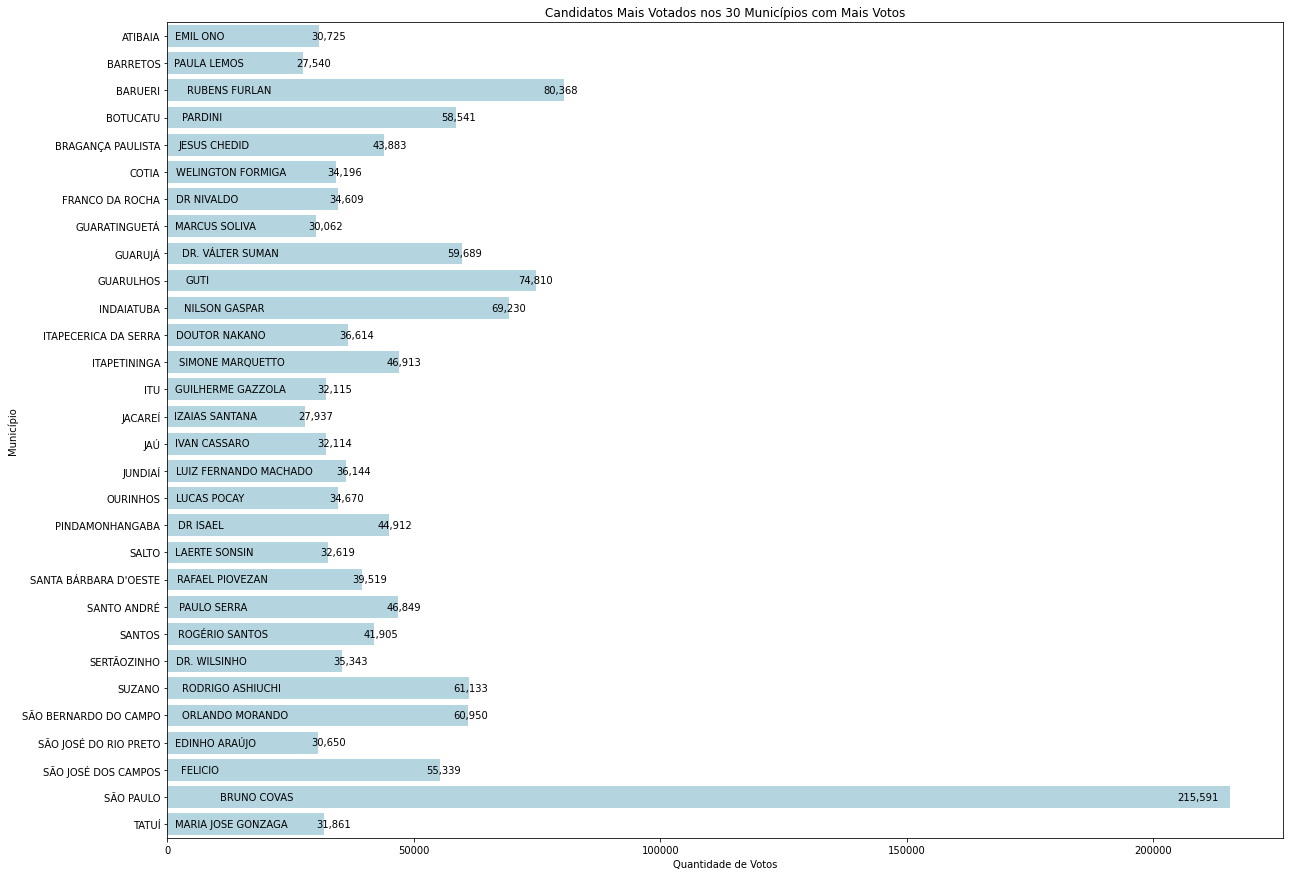

In [ ]:
#Ordeno por municipio e votos
df_grupo_result = df_merged_prefeito.sort_values(by=["NM_MUNICIPIO", "QT_VOTOS"], ascending=[True, False])

# Encontro o candidato mais votado em cada município
candidato_mais_votado = df_grupo_result.groupby("NM_MUNICIPIO").first().reset_index()

# Encontro os 30 municípios mais votados
top_30_municipios = candidato_mais_votado.groupby("NM_MUNICIPIO")["QT_VOTOS"].sum().nlargest(30).index

# Filtro o DataFrame para incluir apenas os 15 municípios mais votados
candidato_mais_votado_top30 = candidato_mais_votado[candidato_mais_votado["NM_MUNICIPIO"].isin(top_30_municipios)]

# Defino a paleta de cores para criar um gradiente de azul

plt.figure(figsize=(20, 15))
ax = sns.barplot(x="QT_VOTOS", y="NM_MUNICIPIO", data=candidato_mais_votado_top30, dodge=False, color='lightblue')

# Adiciono o valor dos votos dentro de cada barra
for idx, p in enumerate(ax.patches):
    width = p.get_width()
    plt.text(width * 0.95, p.get_y() + p.get_height() / 2, f"{int(width):,}", va='center')

    # Obtenho o nome do candidato correspondente à barra atual
    candidato = candidato_mais_votado_top30.iloc[idx]["NM_VOTAVEL"]

    # Adiciono o nome do candidato dentro da barra
    plt.text(width * 0.05, p.get_y() + p.get_height() / 2, candidato, va='center', ha='left')


plt.xlabel("Quantidade de Votos")
plt.ylabel("Município")
plt.title("Candidatos Mais Votados nos 30 Municípios com Mais Votos")
plt.show()

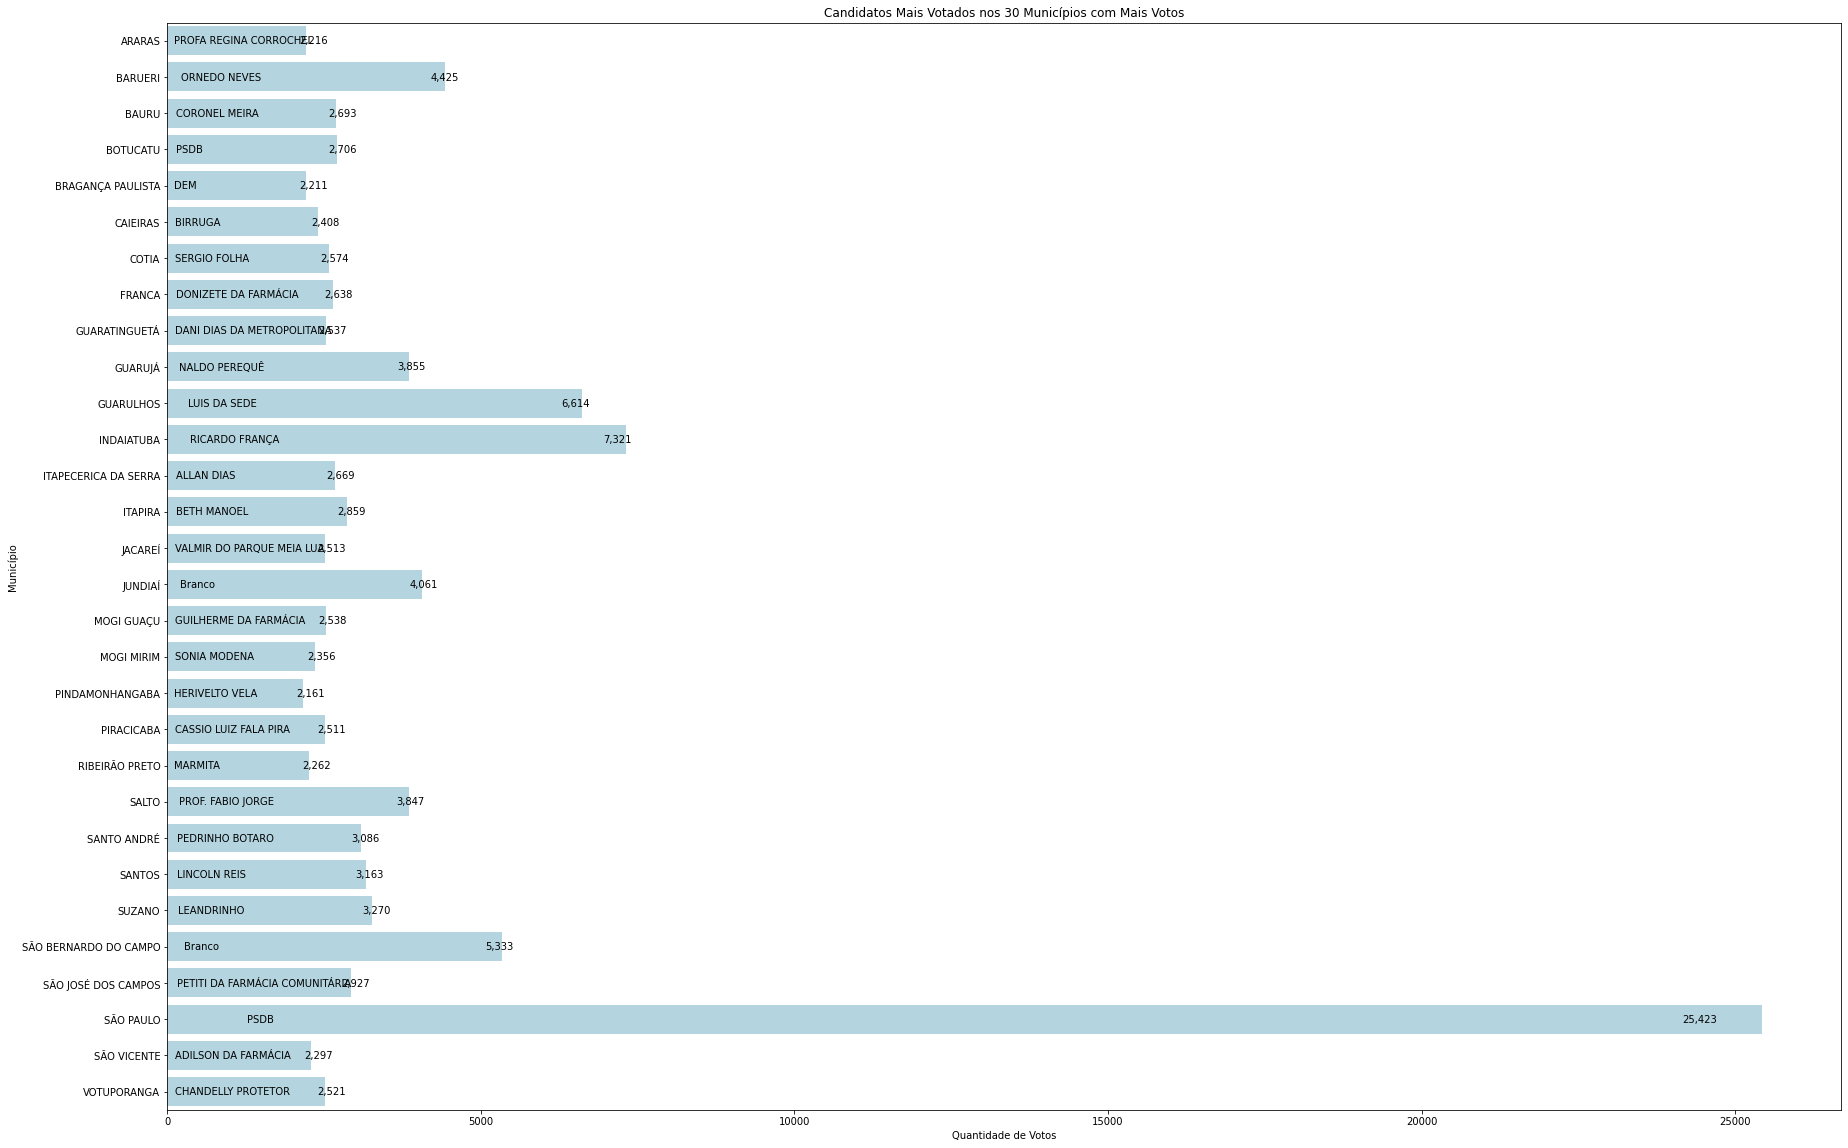

In [ ]:
# Encontro o candidato mais votado em cada município
vereador_mais_votado = df_merged_Vereador.groupby("NM_MUNICIPIO").nth(2).reset_index()

# Encontro os 30 municípios mais votados
top_30_municipios = vereador_mais_votado.groupby("NM_MUNICIPIO")["QT_VOTOS"].sum().nlargest(30).index

# Filtro o DataFrame para incluir apenas os 15 municípios mais votados
vereador_mais_votado30 = vereador_mais_votado[vereador_mais_votado["NM_MUNICIPIO"].isin(top_30_municipios)]

# Defino a paleta de cores para criar um gradiente de azul

plt.figure(figsize=(30, 20))
ax = sns.barplot(x="QT_VOTOS", y="NM_MUNICIPIO", data=vereador_mais_votado30, dodge=False, color="lightblue")

# Adiciono o valor dos votos dentro de cada barra
for idx, p in enumerate(ax.patches):
    width = p.get_width()
    plt.text(width * 0.95, p.get_y() + p.get_height() / 2, f"{int(width):,}", va='center')

    # Obtenho o nome do candidato correspondente à barra atual
    candidato = vereador_mais_votado30.iloc[idx]["NM_VOTAVEL"]

    # Adiciono o nome do candidato dentro da barra
    plt.text(width * 0.05, p.get_y() + p.get_height() / 2, candidato, va='center', ha='left')


plt.xlabel("Quantidade de Votos")
plt.ylabel("Município")
plt.title("Candidatos Mais Votados nos 30 Municípios com Mais Votos")
plt.show()

**Resumo**

Para não deixar um gráfico tão grande, optei por escolher os 30 municípios que tiveram mais votos

No primeiro gráfico pode ser visto que prefeitos de cada estado e a quantidade de votos.

NO segundo gráfico pode ver o segundo de cada estado, as pessoas podem se perguntar o motivo de ter escolhido o segundo e não o primeiro. Isso se deve porque o primeiro mais votado foram os votos nulos

### 6.2 Qual o perfil de eleitorado?

#### 6.2.1 Faixa etária

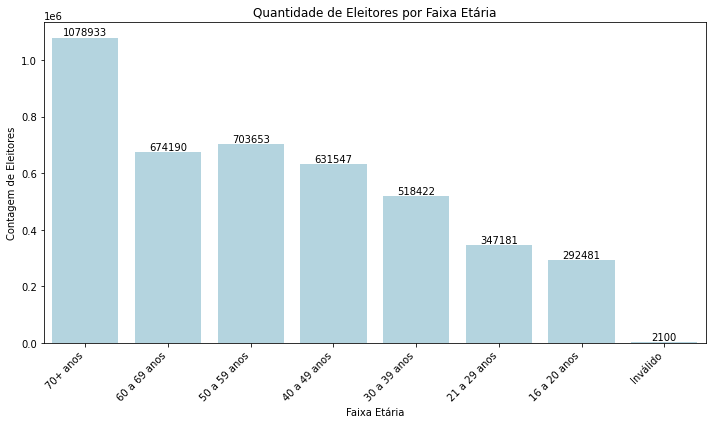

In [ ]:
# Ordenar as faixas etárias
faixas_ordenadas = ['70+ anos',
                    '60 a 69 anos',
                    '50 a 59 anos',
                    '40 a 49 anos',
                    '30 a 39 anos',
                    '21 a 29 anos',
                    '16 a 20 anos',
                    'Inválido']


# Calcular a contagem de ocorrências de cada valor na coluna categórica
contagem_por_valor = df_eleit["DS_FAIXA_ETARIA"].value_counts()

# Reordenar a contagem por faixas etárias
contagem_ordenada = contagem_por_valor.reindex(faixas_ordenadas)

# Criar o gráfico de barras usando o Seaborn com cores personalizadas
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=contagem_ordenada.index, y=contagem_ordenada.values, color='lightblue')
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem de Eleitores')
plt.title('Quantidade de Eleitores por Faixa Etária')
plt.xticks(rotation=45, ha='right')

# Adicionar os valores no topo de cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

#### 6.2.2 Escolaridade

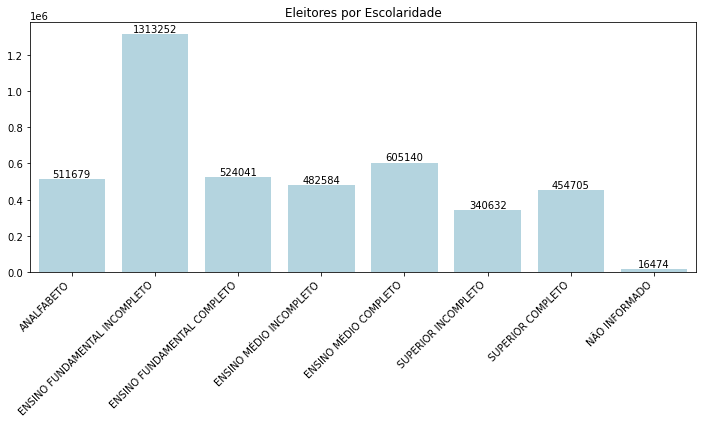

In [ ]:
# Ordenar as faixas etárias
faixas_ordenadas = ['ANALFABETO',
                    'ENSINO FUNDAMENTAL INCOMPLETO',
                    'ENSINO FUNDAMENTAL COMPLETO',
                    'ENSINO MÉDIO INCOMPLETO',
                    'ENSINO MÉDIO COMPLETO',
                    'SUPERIOR INCOMPLETO',
                    'SUPERIOR COMPLETO',
                    'NÃO INFORMADO']


# Calcular a contagem de ocorrências de cada valor na coluna categórica
contagem_por_valor = df_eleit["DS_GRAU_ESCOLARIDADE"].value_counts()

# Reordenar a contagem por faixas etárias
contagem_ordenada = contagem_por_valor.reindex(faixas_ordenadas)

# Criar o gráfico de barras usando o Seaborn com cores personalizadas
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=contagem_ordenada.index, y=contagem_ordenada.values, color='lightblue')
plt.xlabel("")
plt.title('Eleitores por Escolaridade')
plt.xticks(rotation=45, ha='right')

# Adicionar os valores no topo de cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

#### 6.2.3 Genero

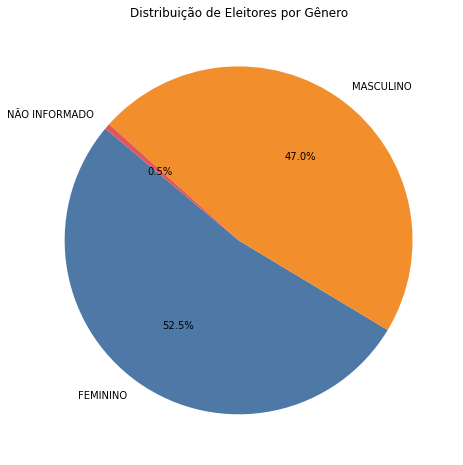

In [ ]:
# Calcular a contagem de ocorrências de cada valor na coluna categórica "DS_GENERO"
contagem_por_genero = df_eleitorado["DS_GENERO"].value_counts()

paleta_cores = ['#4e79a7', '#f28e2c', '#e15759']

# Criar o gráfico de pizza usando o Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(contagem_por_genero.values, labels=contagem_por_genero.index, autopct='%1.1f%%', startangle=140, colors=paleta_cores)
plt.title('Distribuição de Eleitores por Gênero')
plt.show()

**Resumo**

Existe uma grande concentração de eleitores idosos, juntamente temos uma grande concentração de eleitores com ensino fundamental incompleto. Me questionei se isso não tem haver com o numero de eleitores acima dos 70 anos.
Existem um pouco mais de mulheres a homens, outra pergunta que me fiz é se o numero de eleitores acima de 70 não são mulheres, uma vez que as mulheres tem uma pespectiva maior de vida.

### 6.3 Partido

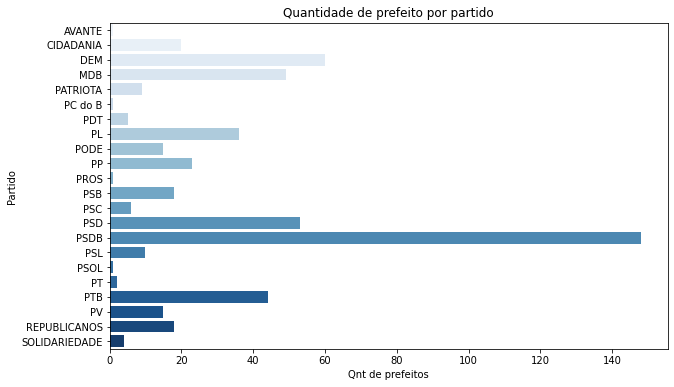

In [ ]:
#Ordeno por municipio e votos
grupo_result_partido = grupo_result.sort_values(by=["NM_MUNICIPIO", "QT_VOTOS"], ascending=[True, False])

# Encontro o candidato mais votado em cada município
grupo_result_partido = grupo_result_partido.groupby("NM_MUNICIPIO").first().reset_index()

contagem_partido = grupo_result_partido.groupby("SG_PARTIDO").size().reset_index(name="Contagem")

# Crio um gráfico de barras usando o Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="Contagem", y="SG_PARTIDO", data=contagem_partido, palette="Blues")
plt.xlabel('Qnt de prefeitos')
plt.ylabel('Partido')
plt.title('Quantidade de prefeito por partido')
plt.show()

**Resumo**

Resolvi criar uma outra pergunta, qual o partido está elegendo mais prefeito?

PSDB vem dominando SP, pelo menos nessa base de dados.